In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts_hc = np.load('ts_hc.npy')
ts_adhd = np.load('ts_adhd.npy')

In [4]:
ts_hc = ts_hc.reshape(52,142*118)

In [5]:
ts_adhd = ts_adhd.reshape(40,142*118)

In [6]:
X = np.append(ts_hc,ts_adhd,axis=0)

In [7]:
X.shape

(92, 16756)

In [8]:
X[0].shape

(16756,)

In [9]:
Y = np.append(np.zeros(52),np.ones(40),axis=0)

In [10]:
Y.shape

(92,)

Now, we define the algorithms that we are going to use. 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [12]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [13]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [14]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [15]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.508690 (0.141014)
SVM: 0.448571 (0.083348)
KNN: 0.519405 (0.138755)
LR: 0.563810 (0.173053)
MLP: 0.494167 (0.200609)
RF: 0.520833 (0.071491)
ET: 0.478810 (0.123463)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957789, p:0.018932
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.199090, p:0.318573
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

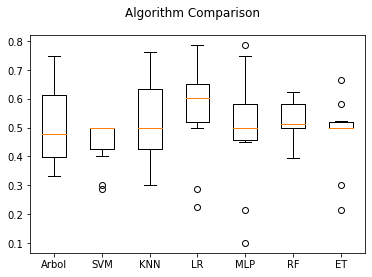

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.436667 (0.267686)
SVM: 0.000000 (0.000000)
KNN: 0.359524 (0.337802)
LR: 0.560000 (0.299555)
MLP: 0.396667 (0.306757)
RF: 0.340000 (0.373214)
ET: 0.266667 (0.388730)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.833451, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.935668, p:0.088706
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

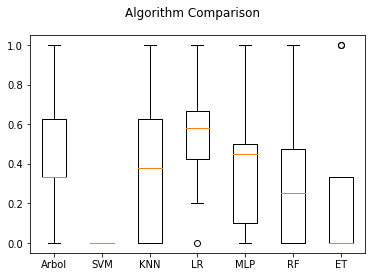

In [17]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.448333 (0.250826)
SVM: 0.000000 (0.000000)
KNN: 0.291667 (0.314576)
LR: 0.463333 (0.280159)
MLP: 0.353333 (0.309552)
RF: 0.225000 (0.223762)
ET: 0.150000 (0.216667)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.840924, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.404025, p:0.037253
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

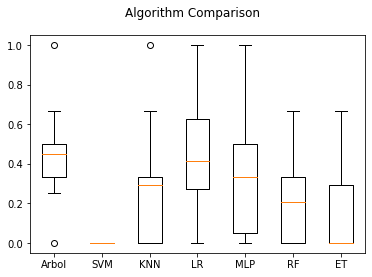

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.490000 (0.103810)
SVM: 0.496667 (0.140726)
KNN: 0.528889 (0.118759)
LR: 0.573333 (0.149584)
MLP: 0.496667 (0.172280)
RF: 0.510000 (0.115090)
ET: 0.486667 (0.138225)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948122, p:0.005789
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.446212, p:0.844970
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

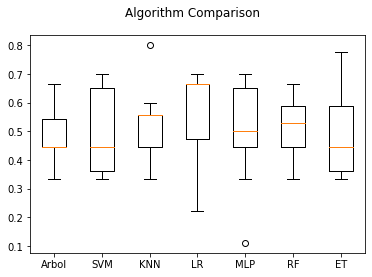

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 2 components

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
pca.fit(X)

PCA(n_components=2)

In [23]:
X_pca2 = pca.transform(X)

In [24]:
X_pca2.shape

(92, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.427024 (0.085252)
SVM: 0.455714 (0.099670)
KNN: 0.469524 (0.096958)
LR: 0.476429 (0.112115)
MLP: 0.494048 (0.051960)
RF: 0.404524 (0.151089)
ET: 0.467857 (0.075677)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.886979, p:0.000012
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.069589, p:0.069383
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

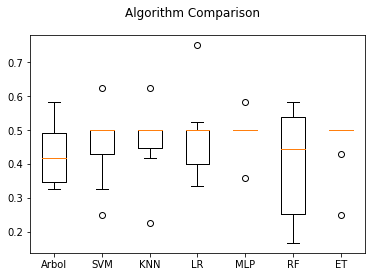

In [25]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.341905 (0.197169)
SVM: 0.140000 (0.310483)
KNN: 0.125000 (0.301040)
LR: 0.100000 (0.213437)
MLP: 0.100000 (0.300000)
RF: 0.345000 (0.311096)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.639781, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.981635, p:0.445256
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

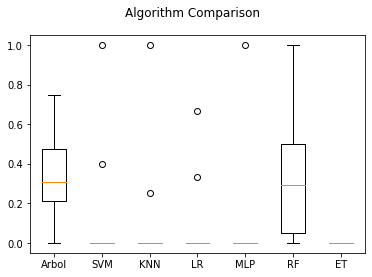

In [26]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.340000 (0.179846)
SVM: 0.065000 (0.134257)
KNN: 0.045000 (0.090692)
LR: 0.100000 (0.213437)
MLP: 0.016667 (0.050000)
RF: 0.228333 (0.181972)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.670244, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.322379, p:0.043397
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

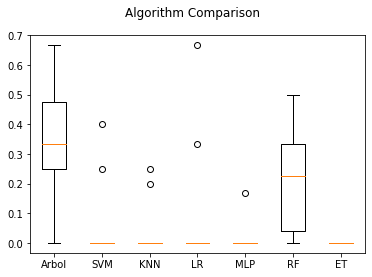

In [27]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.424444 (0.092936)
SVM: 0.508889 (0.147221)
KNN: 0.531111 (0.167906)
LR: 0.500000 (0.138867)
MLP: 0.554444 (0.123773)
RF: 0.414444 (0.132035)
ET: 0.518889 (0.139492)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938933, p:0.001992
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.422284, p:0.861480
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

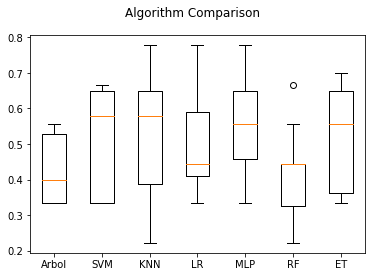

In [28]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 10 components

In [29]:
pca = PCA(n_components=10)

In [30]:
pca.fit(X)

PCA(n_components=10)

In [31]:
X_pca10 = pca.transform(X)

In [32]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.506190 (0.127782)
SVM: 0.500833 (0.041908)
KNN: 0.537500 (0.103177)
LR: 0.457500 (0.123432)
MLP: 0.537857 (0.113081)
RF: 0.555833 (0.134230)
ET: 0.510357 (0.089310)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.981004, p:0.366942
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.485486, p:0.197653
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

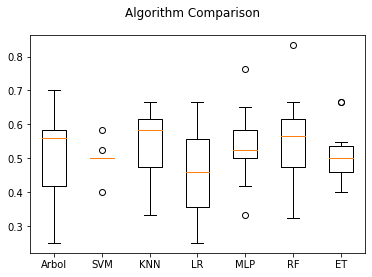

In [33]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.465000 (0.198389)
SVM: 0.100000 (0.200000)
KNN: 0.510000 (0.430000)
LR: 0.327500 (0.287857)
MLP: 0.436667 (0.297191)
RF: 0.511190 (0.345562)
ET: 0.229524 (0.303164)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.859186, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.917842, p:0.091638
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

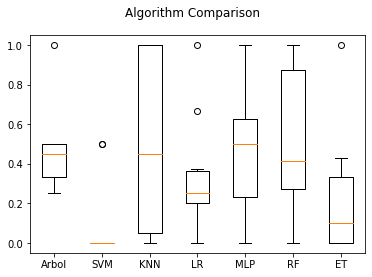

In [34]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.456667 (0.230844)
SVM: 0.058333 (0.118145)
KNN: 0.245000 (0.211351)
LR: 0.340000 (0.266896)
MLP: 0.350000 (0.240947)
RF: 0.428333 (0.282061)
ET: 0.275000 (0.333437)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.888636, p:0.000014
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.571139, p:0.170362
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

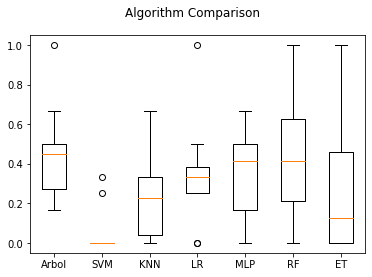

In [35]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.502222 (0.129653)
SVM: 0.552222 (0.148411)
KNN: 0.542222 (0.087319)
LR: 0.424444 (0.090376)
MLP: 0.540000 (0.160262)
RF: 0.532222 (0.110939)
ET: 0.477778 (0.119670)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.933870, p:0.001134
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.448609, p:0.210560
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

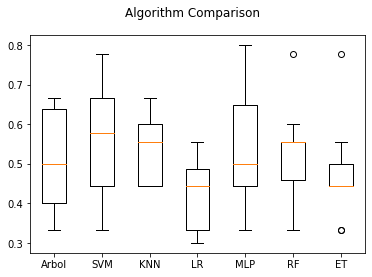

In [36]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [37]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [38]:
pca = PCA(n_components=50)

In [39]:
pca.fit(X)

PCA(n_components=50)

In [40]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.466190 (0.118334)
SVM: 0.443929 (0.112168)
KNN: 0.444405 (0.106210)
LR: 0.514167 (0.190243)
MLP: 0.465357 (0.195866)
RF: 0.618571 (0.170526)
ET: 0.538690 (0.105899)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.971032, p:0.104262
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.561989, p:0.173106
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

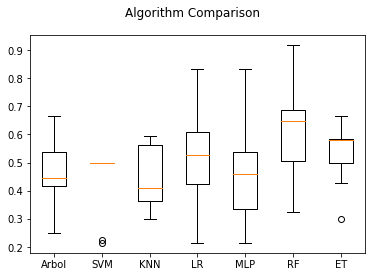

In [41]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.420000 (0.257854)
SVM: 0.020000 (0.060000)
KNN: 0.250000 (0.403113)
LR: 0.453333 (0.248193)
MLP: 0.253333 (0.388501)
RF: 0.633333 (0.350000)
ET: 0.516667 (0.450000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.807129, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.189854, p:0.055542
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

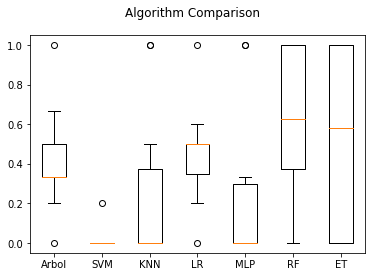

In [42]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.386667 (0.230434)
SVM: 0.025000 (0.075000)
KNN: 0.066667 (0.110554)
LR: 0.481667 (0.255435)
MLP: 0.208333 (0.277013)
RF: 0.418333 (0.245566)
ET: 0.173333 (0.157621)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.847067, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.150704, p:0.059724
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

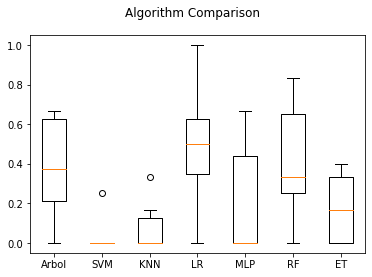

In [43]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.467778 (0.121559)
SVM: 0.485556 (0.164358)
KNN: 0.485556 (0.110448)
LR: 0.520000 (0.154344)
MLP: 0.488889 (0.148657)
RF: 0.651111 (0.157072)
ET: 0.584444 (0.141962)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964208, p:0.042933
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.496905, p:0.808319
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

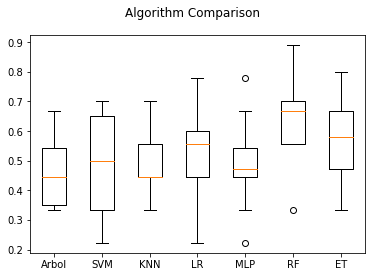

In [44]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [45]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [46]:
from sklearn.manifold import TSNE

In [47]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.407381 (0.108089)
SVM: 0.330833 (0.181795)
KNN: 0.485833 (0.090527)
LR: 0.557857 (0.170428)
MLP: 0.424762 (0.133237)
RF: 0.435357 (0.150851)
ET: 0.466667 (0.100000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939928, p:0.002230
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.082095, p:0.067801
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

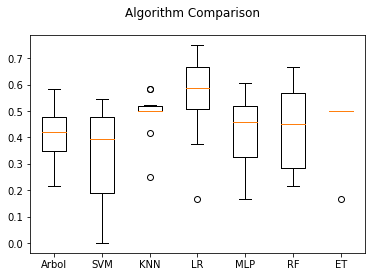

In [48]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.278571 (0.333342)
SVM: 0.136905 (0.178274)
KNN: 0.190000 (0.323883)
LR: 0.506667 (0.392088)
MLP: 0.183333 (0.213437)
RF: 0.393333 (0.355528)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.738807, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.628431, p:0.024445
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

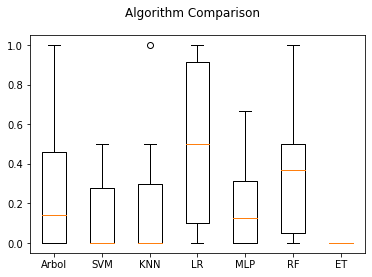

In [49]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.161667 (0.206027)
SVM: 0.200000 (0.276887)
KNN: 0.108333 (0.204294)
LR: 0.308333 (0.229885)
MLP: 0.181667 (0.190970)
RF: 0.220000 (0.193764)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.751836, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.694929, p:0.136944
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

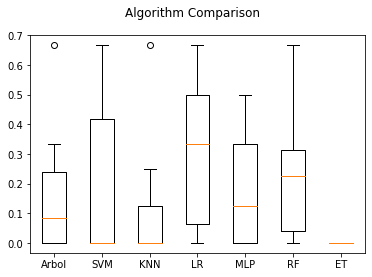

In [50]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.423333 (0.050295)
SVM: 0.302222 (0.155381)
KNN: 0.520000 (0.135701)
LR: 0.562222 (0.202893)
MLP: 0.422222 (0.134807)
RF: 0.436667 (0.091631)
ET: 0.518889 (0.171273)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.963179, p:0.037596
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.925466, p:0.090373
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

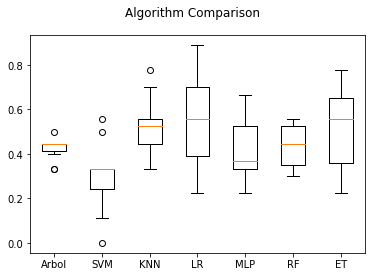

In [51]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [52]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.519762 (0.135031)
SVM: 0.419048 (0.137581)
KNN: 0.487738 (0.114013)
LR: 0.472738 (0.147863)
MLP: 0.552262 (0.097959)
RF: 0.539286 (0.120284)
ET: 0.484524 (0.080751)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.965153, p:0.048511
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.051502, p:0.401148
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

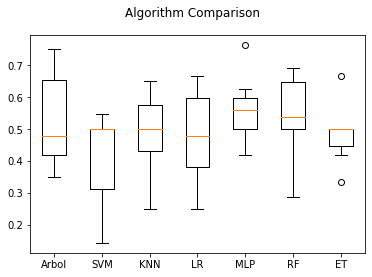

In [53]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.415833 (0.191719)
SVM: 0.150000 (0.240947)
KNN: 0.430000 (0.166300)
LR: 0.475000 (0.314135)
MLP: 0.525000 (0.369026)
RF: 0.436667 (0.237323)
ET: 0.216667 (0.350000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.888695, p:0.000014
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.961984, p:0.458225
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

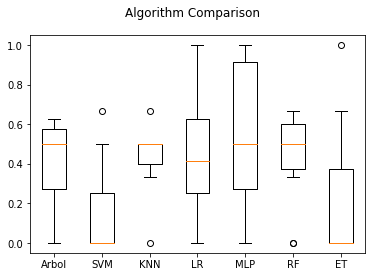

In [54]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.470000 (0.295409)
SVM: 0.216667 (0.350000)
KNN: 0.370000 (0.191166)
LR: 0.311667 (0.155644)
MLP: 0.261667 (0.197491)
RF: 0.415000 (0.247257)
ET: 0.133333 (0.221108)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.904363, p:0.000058
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.510670, p:0.798046
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

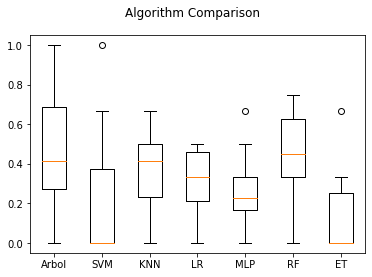

In [55]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.556667 (0.132446)
SVM: 0.491111 (0.153864)
KNN: 0.520000 (0.116089)
LR: 0.508889 (0.164939)
MLP: 0.563333 (0.121924)
RF: 0.563333 (0.091631)
ET: 0.574444 (0.125713)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.950456, p:0.007661
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.838012, p:0.545288
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

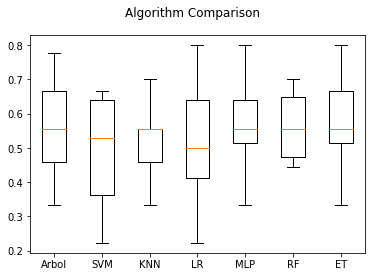

In [56]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [57]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [58]:
from umap import UMAP

In [59]:
reducer = UMAP()

In [60]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.543929 (0.117576)
SVM: 0.478095 (0.077583)
KNN: 0.529881 (0.116735)
LR: 0.478095 (0.125961)
MLP: 0.492262 (0.117655)
RF: 0.458929 (0.103015)
ET: 0.476548 (0.106838)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.970029, p:0.091491
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.771693, p:0.595050
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

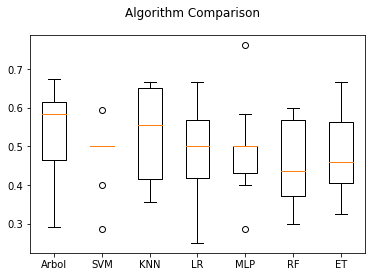

In [61]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.497857 (0.262213)
SVM: 0.050000 (0.150000)
KNN: 0.610000 (0.434626)
LR: 0.350000 (0.390512)
MLP: 0.275000 (0.333437)
RF: 0.400000 (0.292973)
ET: 0.350000 (0.435890)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.810638, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.277941, p:0.047148
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

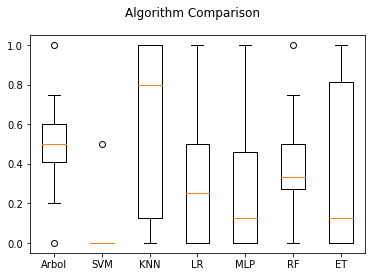

In [62]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.495000 (0.288584)
SVM: 0.033333 (0.100000)
KNN: 0.211667 (0.162967)
LR: 0.128333 (0.137042)
MLP: 0.170000 (0.211056)
RF: 0.261667 (0.167008)
ET: 0.128333 (0.137042)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.827285, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.726202, p:0.020335
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

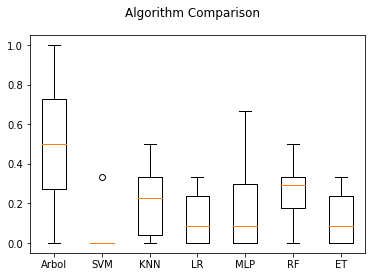

In [63]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.556667 (0.108007)
SVM: 0.518889 (0.130341)
KNN: 0.585556 (0.137711)
LR: 0.511111 (0.150637)
MLP: 0.506667 (0.122040)
RF: 0.487778 (0.114875)
ET: 0.508889 (0.136879)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938631, p:0.001925
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.318637, p:0.924918
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

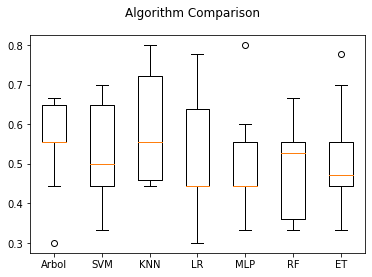

In [64]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [65]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [66]:
reducer = UMAP(n_components=10)

In [67]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.459167 (0.152907)
SVM: 0.500000 (0.000000)
KNN: 0.456071 (0.108238)
LR: 0.485238 (0.090287)
MLP: 0.449048 (0.064980)
RF: 0.417976 (0.144862)
ET: 0.409643 (0.125637)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.919900, p:0.000261
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.011519, p:0.011876
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

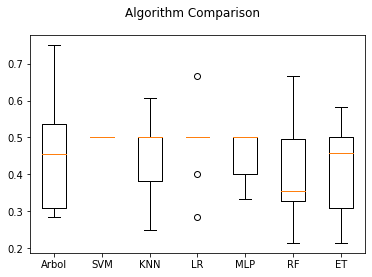

In [68]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.382857 (0.314482)
SVM: 0.000000 (0.000000)
KNN: 0.116667 (0.183333)
LR: 0.100000 (0.300000)
MLP: 0.033333 (0.100000)
RF: 0.238333 (0.249115)
ET: 0.128333 (0.172892)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.640660, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.022853, p:0.075615
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

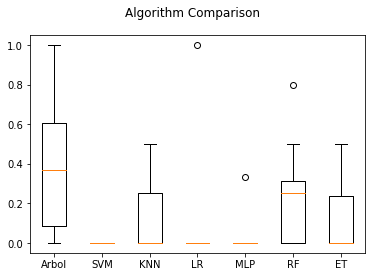

In [69]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.368333 (0.275726)
SVM: 0.000000 (0.000000)
KNN: 0.116667 (0.183333)
LR: 0.033333 (0.100000)
MLP: 0.033333 (0.100000)
RF: 0.250000 (0.247207)
ET: 0.125000 (0.154785)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.648422, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.827747, p:0.000412
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

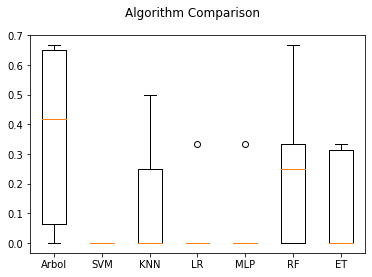

In [70]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.488889 (0.171774)
SVM: 0.563333 (0.144021)
KNN: 0.465556 (0.136486)
LR: 0.528889 (0.146667)
MLP: 0.487778 (0.121356)
RF: 0.433333 (0.149154)
ET: 0.411111 (0.127754)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.924334, p:0.000411
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.206436, p:0.973549
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

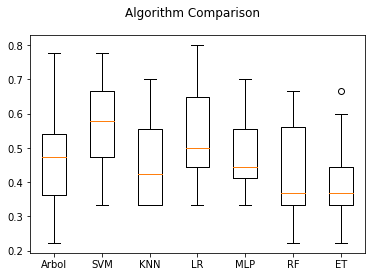

In [71]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.268214 (0.167493)
SVM: 0.469167 (0.194610)
KNN: 0.448214 (0.108198)
LR: 0.447857 (0.072550)
MLP: 0.482143 (0.102790)
RF: 0.328214 (0.066684)
ET: 0.471429 (0.074574)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.937446, p:0.001685
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.654360, p:0.023280
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

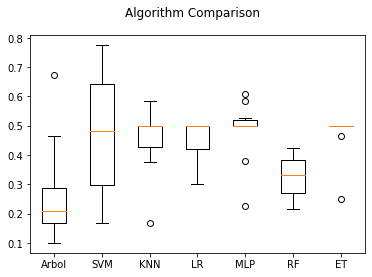

In [72]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.133333 (0.193218)
SVM: 0.321667 (0.324384)
KNN: 0.083333 (0.170783)
LR: 0.000000 (0.000000)
MLP: 0.196667 (0.180401)
RF: 0.200000 (0.194365)
ET: 0.020000 (0.060000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.685692, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.492142, p:0.000757
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

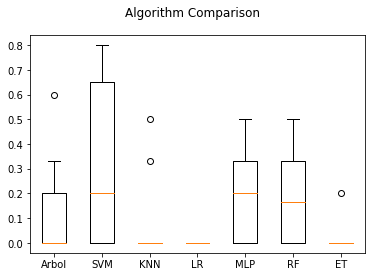

In [73]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.161667 (0.248780)
SVM: 0.340000 (0.305705)
KNN: 0.066667 (0.133333)
LR: 0.000000 (0.000000)
MLP: 0.266667 (0.257660)
RF: 0.195000 (0.174809)
ET: 0.050000 (0.150000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.690662, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.020519, p:0.001799
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

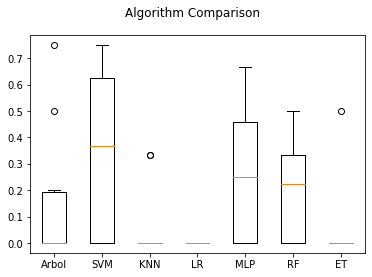

In [74]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.283333 (0.159106)
SVM: 0.471111 (0.177166)
KNN: 0.480000 (0.156252)
LR: 0.500000 (0.147489)
MLP: 0.455556 (0.131562)
RF: 0.348889 (0.070132)
ET: 0.500000 (0.142638)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947559, p:0.005413
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.105856, p:0.369053
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

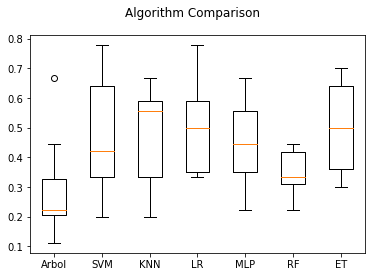

In [75]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.586190 (0.161839)
SVM: 0.500000 (0.000000)
KNN: 0.467976 (0.172984)
LR: 0.504167 (0.199470)
MLP: 0.508452 (0.108693)
RF: 0.552500 (0.133986)
ET: 0.466667 (0.186983)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.965974, p:0.053961
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.777034, p:0.018477
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

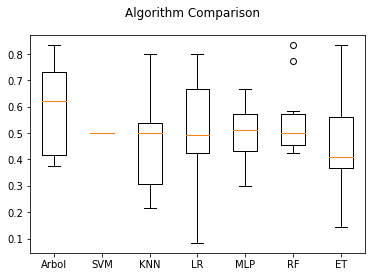

In [76]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.483333 (0.266771)
SVM: 0.000000 (0.000000)
KNN: 0.283333 (0.394757)
LR: 0.437857 (0.334512)
MLP: 0.408333 (0.419076)
RF: 0.496667 (0.175563)
ET: 0.300000 (0.458258)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.816976, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.772169, p:0.119281
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

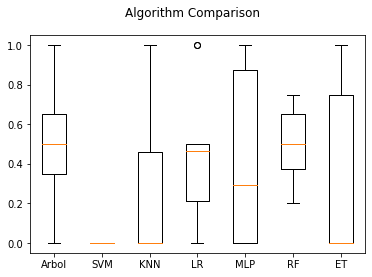

In [77]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.508333 (0.256715)
SVM: 0.000000 (0.000000)
KNN: 0.151667 (0.203640)
LR: 0.385000 (0.297438)
MLP: 0.186667 (0.173973)
RF: 0.448333 (0.230633)
ET: 0.123333 (0.219114)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.840652, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.450176, p:0.209996
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

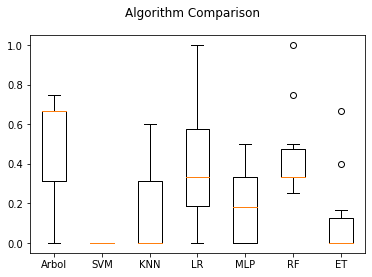

In [78]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.564444 (0.180041)
SVM: 0.563333 (0.144021)
KNN: 0.497778 (0.155619)
LR: 0.482222 (0.181571)
MLP: 0.532222 (0.110939)
RF: 0.554444 (0.133375)
ET: 0.500000 (0.192450)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.965305, p:0.049478
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.641977, p:0.696213
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

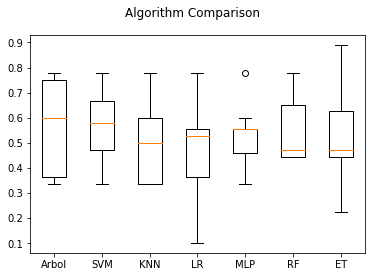

In [79]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.537024 (0.176503)
SVM: 0.500000 (0.000000)
KNN: 0.534643 (0.182418)
LR: 0.485714 (0.042857)
MLP: 0.485714 (0.042857)
RF: 0.590476 (0.118371)
ET: 0.514524 (0.159473)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.898035, p:0.000032
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 6.019495, p:0.000051
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

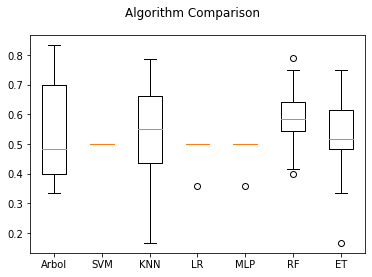

In [16]:
from sklearn import manifold
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.441667 (0.315634)
SVM: 0.000000 (0.000000)
KNN: 0.330000 (0.316386)
LR: 0.000000 (0.000000)
MLP: 0.000000 (0.000000)
RF: 0.523333 (0.265539)
ET: 0.343571 (0.298951)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.752686, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 7.732207, p:0.000003
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

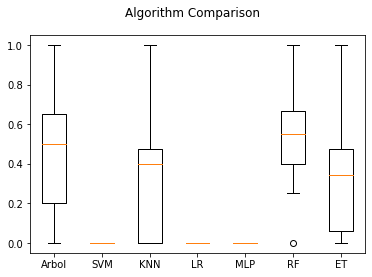

In [17]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.431667 (0.288333)
SVM: 0.000000 (0.000000)
KNN: 0.395000 (0.399726)
LR: 0.000000 (0.000000)
MLP: 0.000000 (0.000000)
RF: 0.481667 (0.200617)
ET: 0.416667 (0.298142)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.756682, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 9.129305, p:0.000000
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

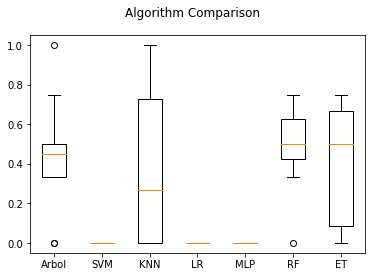

In [18]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.535556 (0.143139)
SVM: 0.563333 (0.144021)
KNN: 0.522222 (0.145806)
LR: 0.543333 (0.137387)
MLP: 0.543333 (0.137387)
RF: 0.595556 (0.103661)
ET: 0.500000 (0.155635)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.955234, p:0.013758
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.209651, p:0.972501
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

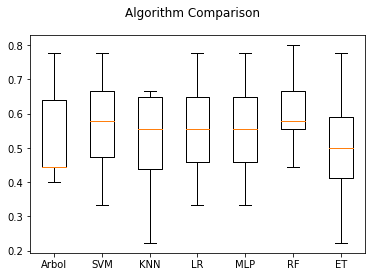

In [19]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [20]:
from sklearn import manifold
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.601786 (0.108834)
SVM: 0.483333 (0.050000)
KNN: 0.537143 (0.103477)
LR: 0.488095 (0.024398)
MLP: 0.467738 (0.110923)
RF: 0.505000 (0.197600)
ET: 0.449643 (0.120367)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.945834, p:0.004414
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.551417, p:0.000679
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

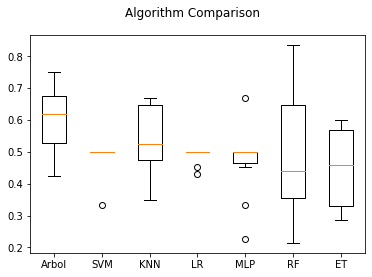

In [22]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.546667 (0.235443)
SVM: 0.028571 (0.085714)
KNN: 0.503333 (0.264764)
LR: 0.025000 (0.075000)
MLP: 0.175000 (0.261964)
RF: 0.438333 (0.355985)
ET: 0.300000 (0.400000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.801299, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.111688, p:0.064195
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

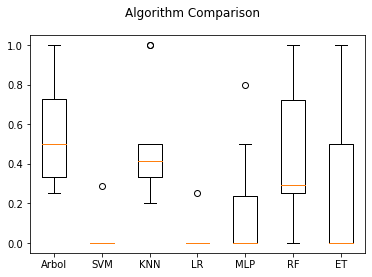

In [23]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.493333 (0.216307)
SVM: 0.050000 (0.150000)
KNN: 0.370000 (0.135974)
LR: 0.033333 (0.100000)
MLP: 0.158333 (0.218740)
RF: 0.343333 (0.229879)
ET: 0.095000 (0.122939)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.828190, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.351035, p:0.248338
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

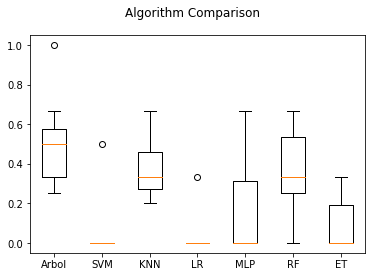

In [24]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.610000 (0.078638)
SVM: 0.533333 (0.163224)
KNN: 0.531111 (0.091867)
LR: 0.532222 (0.121559)
MLP: 0.543333 (0.162119)
RF: 0.534444 (0.164238)
ET: 0.478889 (0.102132)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939388, p:0.002097
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.719655, p:0.131041
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

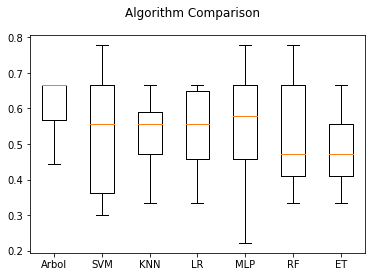

In [25]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [26]:
clf = manifold.LocallyLinearEmbedding(10, n_components=50,method='standard')
X_lle100 = clf.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.527024 (0.146150)
SVM: 0.500000 (0.000000)
KNN: 0.520238 (0.099526)
LR: 0.491190 (0.046120)
MLP: 0.525595 (0.102322)
RF: 0.510952 (0.170104)
ET: 0.457381 (0.075476)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.912677, p:0.000128
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.419489, p:0.005513
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

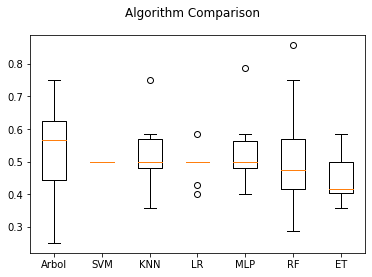

In [27]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.486905 (0.281668)
SVM: 0.000000 (0.000000)
KNN: 0.316667 (0.345205)
LR: 0.050000 (0.150000)
MLP: 0.180000 (0.222711)
RF: 0.426667 (0.293087)
ET: 0.200000 (0.331662)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.752137, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.533773, p:0.029206
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

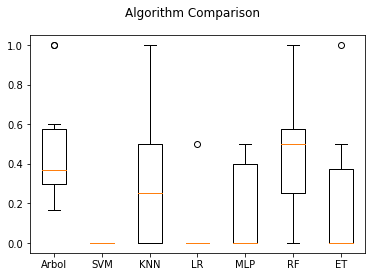

In [28]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.485000 (0.252922)
SVM: 0.000000 (0.000000)
KNN: 0.161667 (0.206027)
LR: 0.033333 (0.100000)
MLP: 0.220000 (0.333400)
RF: 0.340000 (0.266896)
ET: 0.066667 (0.110554)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.728703, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.352414, p:0.041029
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

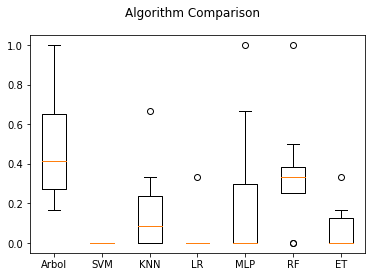

In [29]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.486667 (0.128985)
SVM: 0.563333 (0.144021)
KNN: 0.554444 (0.123773)
LR: 0.541111 (0.134628)
MLP: 0.520000 (0.118092)
RF: 0.530000 (0.134077)
ET: 0.508889 (0.106435)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948490, p:0.006049
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.202689, p:0.974742
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

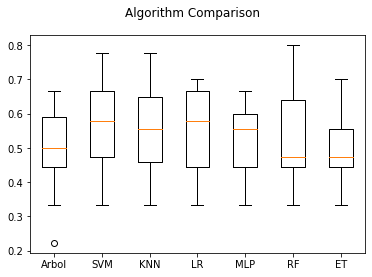

In [30]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# MDS

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.536905 (0.103666)
SVM: 0.489405 (0.129855)
KNN: 0.453452 (0.098786)
LR: 0.490595 (0.051006)
MLP: 0.460238 (0.068595)
RF: 0.518571 (0.118379)
ET: 0.541190 (0.096938)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956580, p:0.016268
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.359639, p:0.244786
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

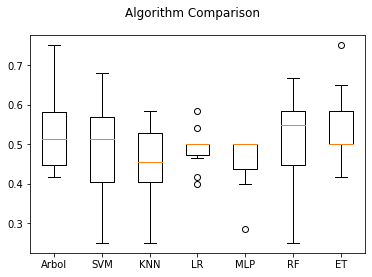

In [31]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.480000 (0.250422)
SVM: 0.383333 (0.211476)
KNN: 0.291667 (0.305619)
LR: 0.203333 (0.220832)
MLP: 0.060000 (0.180000)
RF: 0.448333 (0.305728)
ET: 0.283333 (0.365529)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.849499, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.082131, p:0.382821
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

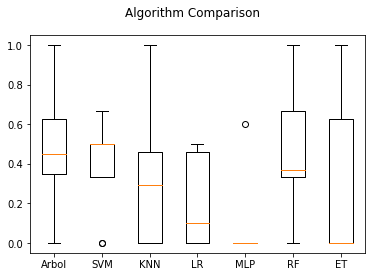

In [32]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.381667 (0.201170)
SVM: 0.311667 (0.202217)
KNN: 0.181667 (0.175823)
LR: 0.158333 (0.176580)
MLP: 0.050000 (0.150000)
RF: 0.331667 (0.200062)
ET: 0.166667 (0.235702)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.846336, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.718910, p:0.635803
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

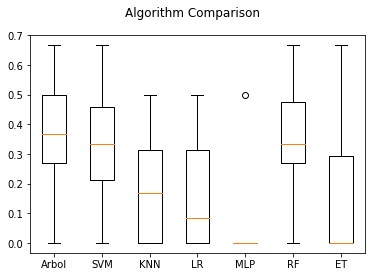

In [33]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.554444 (0.123773)
SVM: 0.532222 (0.140409)
KNN: 0.488889 (0.110554)
LR: 0.507778 (0.121721)
MLP: 0.530000 (0.118222)
RF: 0.545556 (0.101647)
ET: 0.575556 (0.134330)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.954515, p:0.012585
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.847293, p:0.538481
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

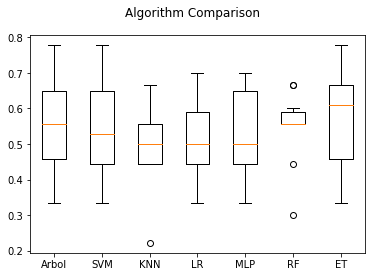

In [34]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.501548 (0.116812)
SVM: 0.477500 (0.059634)
KNN: 0.522619 (0.149218)
LR: 0.441190 (0.153457)
MLP: 0.502500 (0.007500)
RF: 0.467381 (0.182358)
ET: 0.529048 (0.128120)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939395, p:0.002099
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.009822, p:0.001834
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

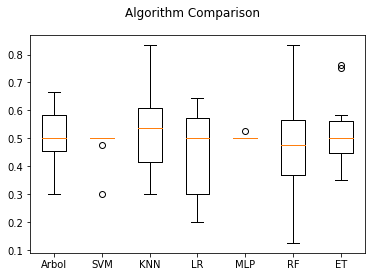

In [35]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.335000 (0.220000)
SVM: 0.050000 (0.150000)
KNN: 0.490000 (0.395545)
LR: 0.407500 (0.332174)
MLP: 0.050000 (0.150000)
RF: 0.393333 (0.262276)
ET: 0.291667 (0.348110)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.815085, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.974579, p:0.012733
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

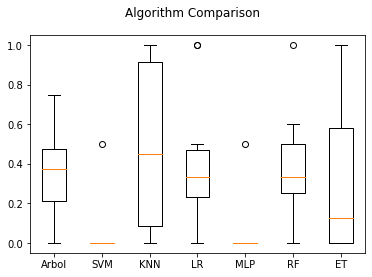

In [36]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.481667 (0.331197)
SVM: 0.020000 (0.060000)
KNN: 0.265000 (0.239959)
LR: 0.303333 (0.292575)
MLP: 0.025000 (0.075000)
RF: 0.386667 (0.329629)
ET: 0.203333 (0.255799)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.784968, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.408301, p:0.036956
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

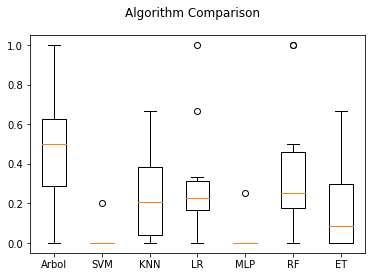

In [37]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.455556 (0.101835)
SVM: 0.541111 (0.159788)
KNN: 0.543333 (0.154316)
LR: 0.421111 (0.120539)
MLP: 0.563333 (0.144021)
RF: 0.433333 (0.172204)
ET: 0.551111 (0.157072)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964644, p:0.045421
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.594010, p:0.733923
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

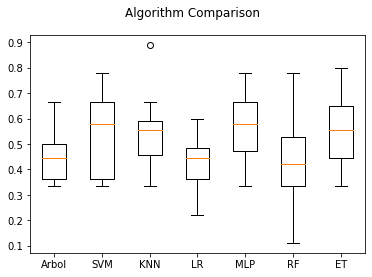

In [38]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.555357 (0.165813)
SVM: 0.533571 (0.087748)
KNN: 0.516786 (0.181249)
LR: 0.571786 (0.114470)
MLP: 0.505833 (0.143406)
RF: 0.482738 (0.104055)
ET: 0.456905 (0.128604)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.972874, p:0.132479
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.944705, p:0.469827
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

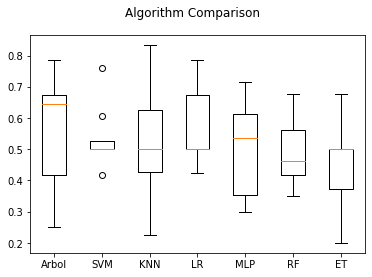

In [39]:
clf = manifold.MDS(n_components=50, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.462500 (0.162671)
SVM: 0.200000 (0.256038)
KNN: 0.340000 (0.384650)
LR: 0.466667 (0.248998)
MLP: 0.348333 (0.324076)
RF: 0.350000 (0.292973)
ET: 0.150000 (0.320156)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.871037, p:0.000003
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.566957, p:0.755015
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

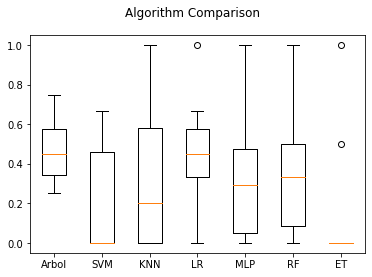

In [40]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.543333 (0.298998)
SVM: 0.166667 (0.232737)
KNN: 0.275000 (0.258333)
LR: 0.486667 (0.291909)
MLP: 0.395000 (0.339612)
RF: 0.228333 (0.181972)
ET: 0.066667 (0.152753)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.866361, p:0.000002
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.188294, p:0.055703
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

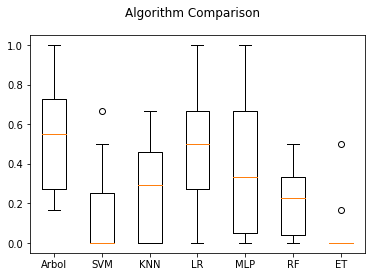

In [41]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.523333 (0.158578)
SVM: 0.552222 (0.145216)
KNN: 0.507778 (0.196390)
LR: 0.563333 (0.091631)
MLP: 0.477778 (0.117694)
RF: 0.500000 (0.140546)
ET: 0.487778 (0.143540)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.964790, p:0.046287
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.766685, p:0.598879
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

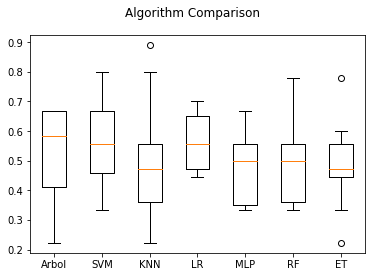

In [42]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='accuracy')